In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# summary statistics for numerical variables:

titanic_df.describe()[['Age', 'SibSp', 'Parch', 'Fare']]

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Comment:**

* age 75% = 38 and age mean = 29.69 $\implies$ age range is mostly between 20 and 40?
* Comparision between SibSp and Parch: 
    * mean SibSp > mean Parch
    * 75% SibSp = 1 
    * 75% Parch = 0
    * $\implies$ not many people bring their children and parents with them. They're more likely to travel with their siblings and spouses (though this is also not a high possibily)
* Fare std = 49.69 and Fare mean > Fare 75% >> Fare median $\implies$ substantial variation in the fare

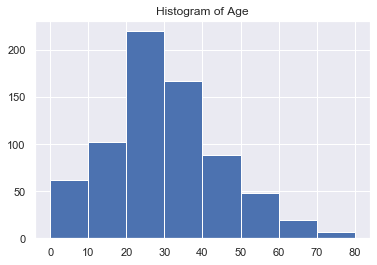

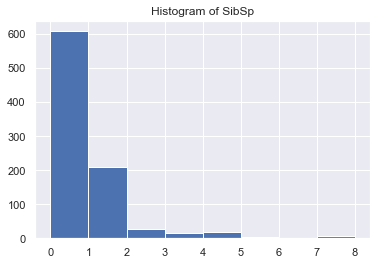

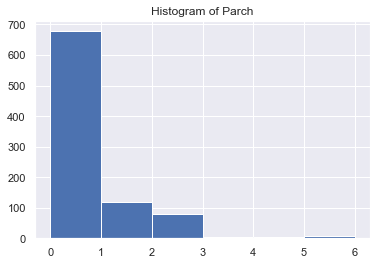

In [4]:
# Histograms:
import math

def plot_hist(variable, n_bins, round_edges=True, graph_size=None): # default size
    fig, ax = plt.subplots(figsize=graph_size)
    plt.title("Histogram of {}".format(variable))
    
    if round_edges:
        val_range = titanic_df[variable].max() - titanic_df[variable].min()
        step = round(val_range/n_bins)
            
        round_min = math.floor(titanic_df[variable].min())
        round_max = math.ceil(titanic_df[variable].max())
        bins = [edge for edge in range(round_min, round_max+step, step)]
    
        ax.set_xticks(bins)
        ax.hist(titanic_df[variable].dropna(), bins=bins)
        
    else:
        ax.hist(titanic_df[variable].dropna(), bins=n_bins)

    
plot_hist('Age', 8)
plot_hist('SibSp', 8)
plot_hist('Parch', 6)

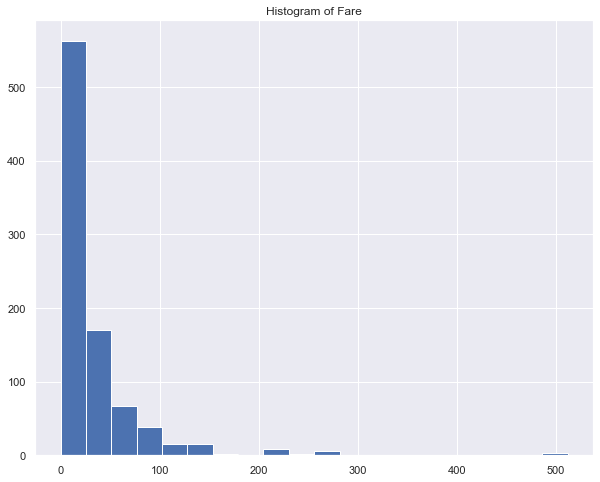

In [27]:
plot_hist('Fare', 20, round_edges=False, graph_size=(10, 8))
#plt.xticks([i for i in range(0, 550, 50)])

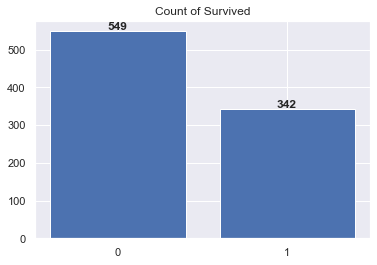

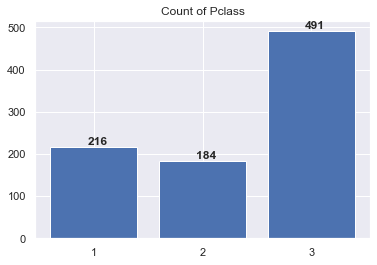

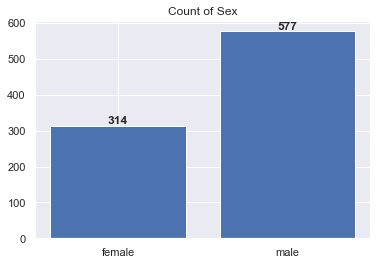

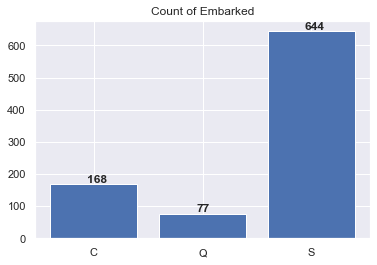

In [6]:
def plot_cat_count(variable):
    categories = titanic_df.groupby(variable).count().index.astype(str)
    values = titanic_df.groupby(variable).count()['PassengerId']
    
    fig, ax = plt.subplots()
    ax.bar(categories, values)
    
    for i, v in enumerate(values):
        ax.text(i - .06, v + 5, str(v), fontweight='bold')
        
    plt.title('Count of {}'.format(variable))    


plot_cat_count('Survived')
plot_cat_count('Pclass')
plot_cat_count('Sex')
plot_cat_count('Embarked')

In [7]:
titanic_df.groupby('Cabin').count()['PassengerId']

# extract a new feature: cabin class?

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: PassengerId, Length: 147, dtype: int64